In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_excel('../data/FY2010_20_Active_Component_Accessions_Non_PriorSvc_Census_Region_v1.xlsx')

In [3]:
df

,division,Year,DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total_Percentage
0,NORTHEAST REGION,2010,16768,12.900000,3139,12.100000,19907,12.700000,57074.685716,18.20,18.30,18.20
1,New England Division,2010,4544,3.500000,705,2.700000,5249,3.400000,58038.261498,4.70,4.70,4.70
2,Middle Atlantic Division,2010,12224,9.400000,2434,9.400000,14658,9.400000,56733.873756,13.50,13.60,13.60
3,MIDWEST REGION,2010,27041,20.800000,4601,17.700000,31642,20.200000,45776.871746,22.40,22.30,22.30
4,East North Central Division,2010,18686,14.300000,3221,12.400000,21907,14.000000,45133.884500,15.60,15.60,15.60
...,...,...,...,...,...,...,...,...,...,...,...,...
146,West South Central Division,2020,18056,15.240000,4319,15.372842,22375,15.267202,60305.367844,12.83,13.33,10.08
147,WEST REGION,2020,28978,24.462059,6772,24.103933,35750,24.393406,69650.761866,24.87,23.69,24.28
148,Mountain Division,2020,9680,8.171466,2332,8.300409,12012,8.196184,57141.732470,8.42,7.43,7.93
149,Pacific Division,2020,19298,16.290594,4440,15.803524,23738,16.197222,75477.887476,16.45,16.26,16.35


In [4]:
##I want all the rows where the column 'division' has 'REGION' in it
#https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/
#Disney checkpoint Q15
df[df['division'].str.contains('REGION')]

,division,Year,DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total_Percentage
0,NORTHEAST REGION,2010,16768,12.900000,3139,12.100000,19907,12.700000,57074.685716,18.20,18.30,18.20
3,MIDWEST REGION,2010,27041,20.800000,4601,17.700000,31642,20.200000,45776.871746,22.40,22.30,22.30
6,SOUTH REGION,2010,55501,42.600000,12309,47.300000,67810,43.400000,44793.094239,35.70,35.90,35.80
10,WEST REGION,2010,30964,23.800000,5966,22.900000,36930,23.600000,49554.226444,23.80,23.50,23.70
14,NORTHEAST REGION,2011,16178,13.000000,3025,12.100000,19203,12.800000,57984.607627,18.20,18.50,18.40
17,MIDWEST REGION,2011,25948,20.800000,4375,17.400000,30323,20.200000,47654.775114,21.80,22.20,22.00
20,SOUTH REGION,2011,52990,42.500000,11956,47.600000,64946,43.300000,46175.941846,35.80,36.00,35.90
24,WEST REGION,2011,29708,23.800000,5743,22.900000,35451,23.600000,50914.002591,24.20,23.30,23.80
28,NORTHEAST REGION,2012,16430,13.100000,2945,12.000000,19375,12.900000,60595.642793,18.50,18.40,18.40
31,MIDWEST REGION,2012,25922,20.600000,4440,18.100000,30362,20.200000,49609.754667,21.20,21.80,21.50


AttributeError: 'numpy.ndarray' object has no attribute 'hist'

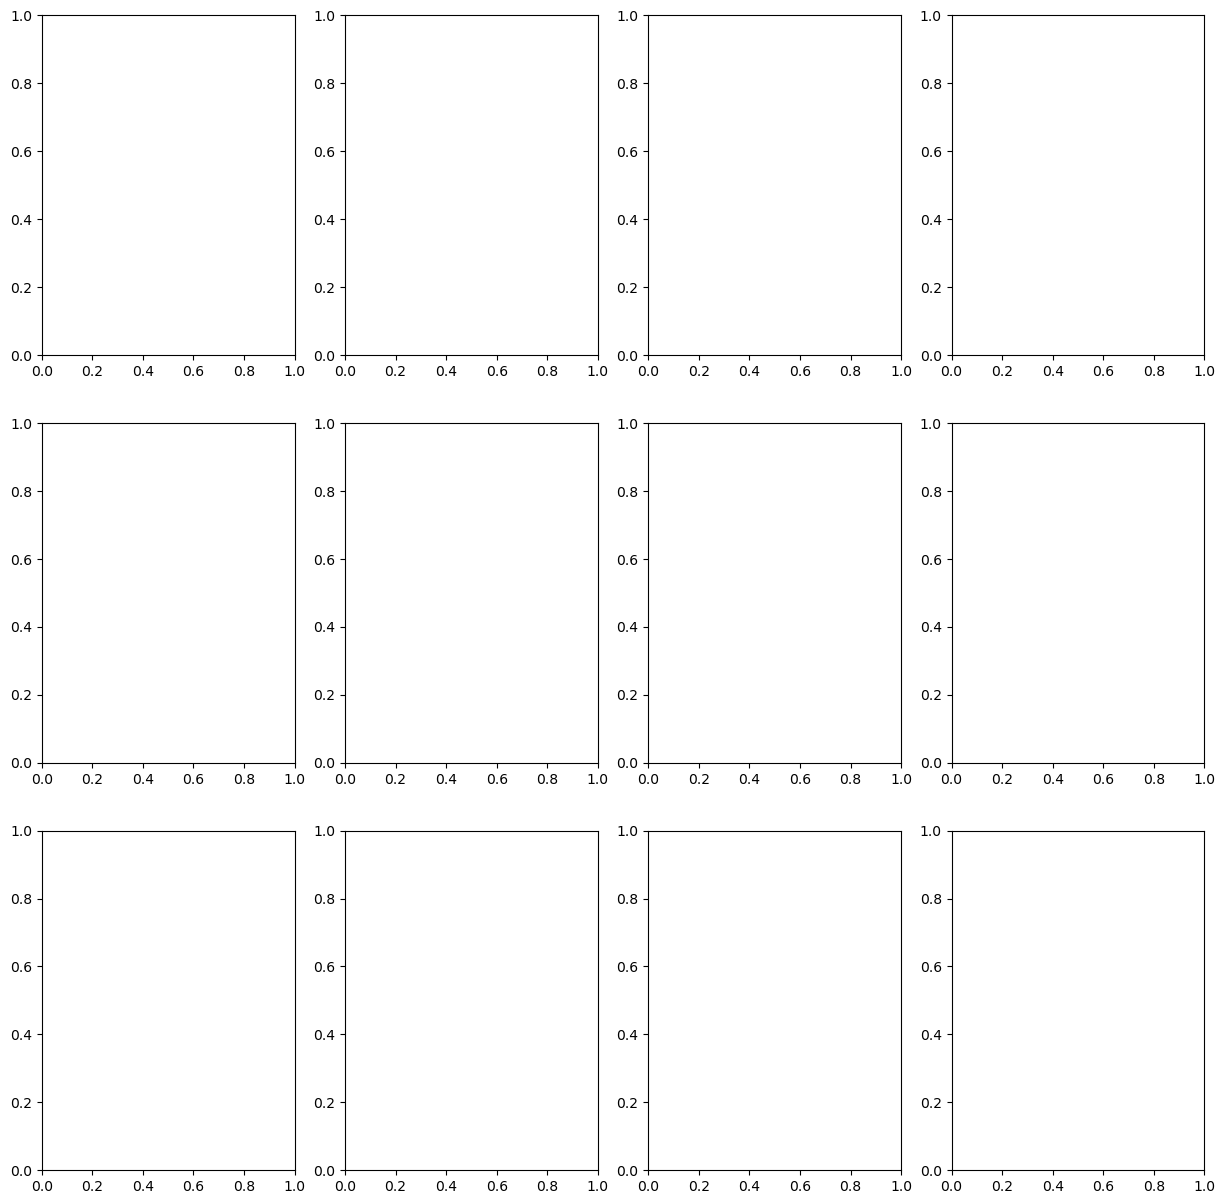

In [7]:
fig, ax = plt.subplots(figsize = (15, 15), nrows=3, ncols=4);
ax[0].hist(df['2010'])
ax[0].set_title('2010')

ax[0].hist(df['2011'])
ax[0].set_title('2011')

ax[0].hist(df['2012'])
ax[0].set_title('2012')

ax[0].hist(df['2013'])
ax[0].set_title('2013')

ax[0].hist(df['2014'])
ax[0].set_title('2014')

ax[0].hist(df['2015'])
ax[0].set_title('2015')

ax[0].hist(df['2016'])
ax[0].set_title('2016')

ax[0].hist(df['2017'])
ax[0].set_title('2017')

ax[0].hist(df['2018'])
ax[0].set_title('2018')

ax[0].hist(df['2019'])
ax[0].set_title('2019')

ax[0].hist(df['2020'])
ax[0].set_title('2020')